# Interpreting ResNet Model With Smooth Gradients

This notebook loads the pretrained ResNet model given by [PaddleClas](https://github.com/PaddlePaddle/PaddleClas/tree/release/2.0) and performs image classification on selected images. 

Interpretations of the predictions are generated and visualized using Consensus algorithm, specifically the `ConsensusInterpreter` class.

In [3]:
import paddle
import interpretdl as it
!ln -s ../tutorials/assets assets

device = 'gpu:0'
paddle.set_device(device)

CUDAPlace(4)

Before interpreting the image, we first take a look at the original image.

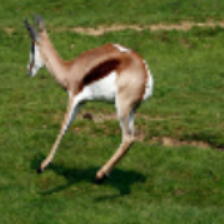

In [2]:
from PIL import Image
from interpretdl.data_processor.readers import read_image

img_path = 'assets/deer.png'
x = Image.fromarray(read_image(img_path)[0])
x

In [9]:
import interpretdl as it
from paddle.vision.models import *

# Here we use four models to give an illustration. Using more models shows more impressive results.
list_models = {
    'resnet18': resnet18(pretrained=True), 
    'resnet34': resnet34(pretrained=True), 
    'resnet50': resnet50(pretrained=True),
    'resnet101': resnet101(pretrained=True), 
    'resnet152': resnet152(pretrained=True), 
    'mobilenet_v2': mobilenet_v2(pretrained=True)
}
consensus = it.ConsensusInterpreter(it.SmoothGradInterpreter, list_models.values(), device=device)

In [10]:
img_path = 'assets/deer.png'
exp = consensus.interpret(img_path)

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [00:02<00:00, 24.98it/s]


Text(0.5, 1.0, 'Consensus')

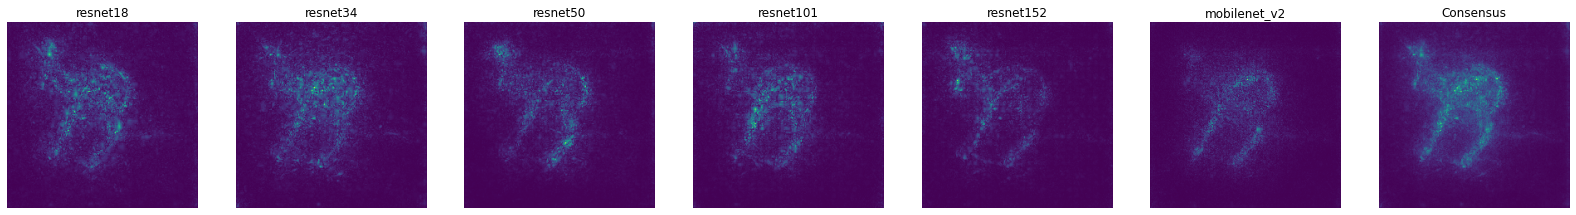

In [11]:
import numpy as np
import matplotlib.pyplot as plt

cols = len(list_models) + 1
psize = 4
fig, ax = plt.subplots(1, cols, figsize=(cols*psize, 1*psize))

for axis in ax:
    axis.axis('off')

for i in range(len(list_models)):
    ax[i].imshow(np.abs(exp[i]).sum(0))
    ax[i].set_title(list(list_models.keys())[i])

ax[-1].imshow(np.abs(exp).sum(1).mean(0))
ax[-1].set_title('Consensus')